In [2]:
library(glmnet)
library(SLOPE)
library(bigstep)

# Project 1

### Problem 1

In [1]:
# data = scale(get(load("Lab3.Rdata")) - 10)
data = get(load("Lab3.Rdata"))
data = apply(data - 10, 2, function(col) col / sd(col))

In [2]:
data[1:5,]

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,3.320701,-4.672019,-3.6207425,-1.8788372,-1.304469,-2.1400544,-0.6836783,-0.6329174,2.916898,6.858462,⋯,-1.2646257,-3.6788223,-4.064593,-4.204200,-4.653301,2.291804,-4.5613786,0.8238200,2.663034,-1.282643
NA06993,4.522049,-2.504244,-0.2989289,1.4740600,1.952473,-0.8951127,1.2726317,0.2504213,3.031755,6.379089,⋯,0.9805873,-1.6659186,-3.935630,-3.568862,-1.885880,3.073146,-0.8298840,2.7096547,2.178062,-1.270634
NA07022,3.593433,-2.993319,-1.1402403,-1.0598208,1.248440,-2.4596897,1.2115513,-0.7036789,3.121900,7.938343,⋯,-2.2887468,-0.8547229,-3.655642,-2.887934,-1.629679,2.061270,-1.6536221,0.9795550,2.414203,-2.635291
NA07034,4.043400,-2.163135,-1.6537376,0.2452835,1.688383,-0.9272713,1.6320421,0.5425016,2.458150,7.731027,⋯,-2.3846812,-0.9925057,-3.033247,-2.722733,-1.613975,1.517324,-2.3507371,-0.3230593,2.188321,-2.646971
NA07055,4.899260,-2.276058,0.1766910,0.5478394,1.323379,-2.1625483,0.3988189,0.8411762,1.783395,7.105700,⋯,-0.6617594,-1.2074156,-3.378331,-3.555149,-2.252320,2.230214,-0.9541902,1.5572120,1.979752,-1.028758


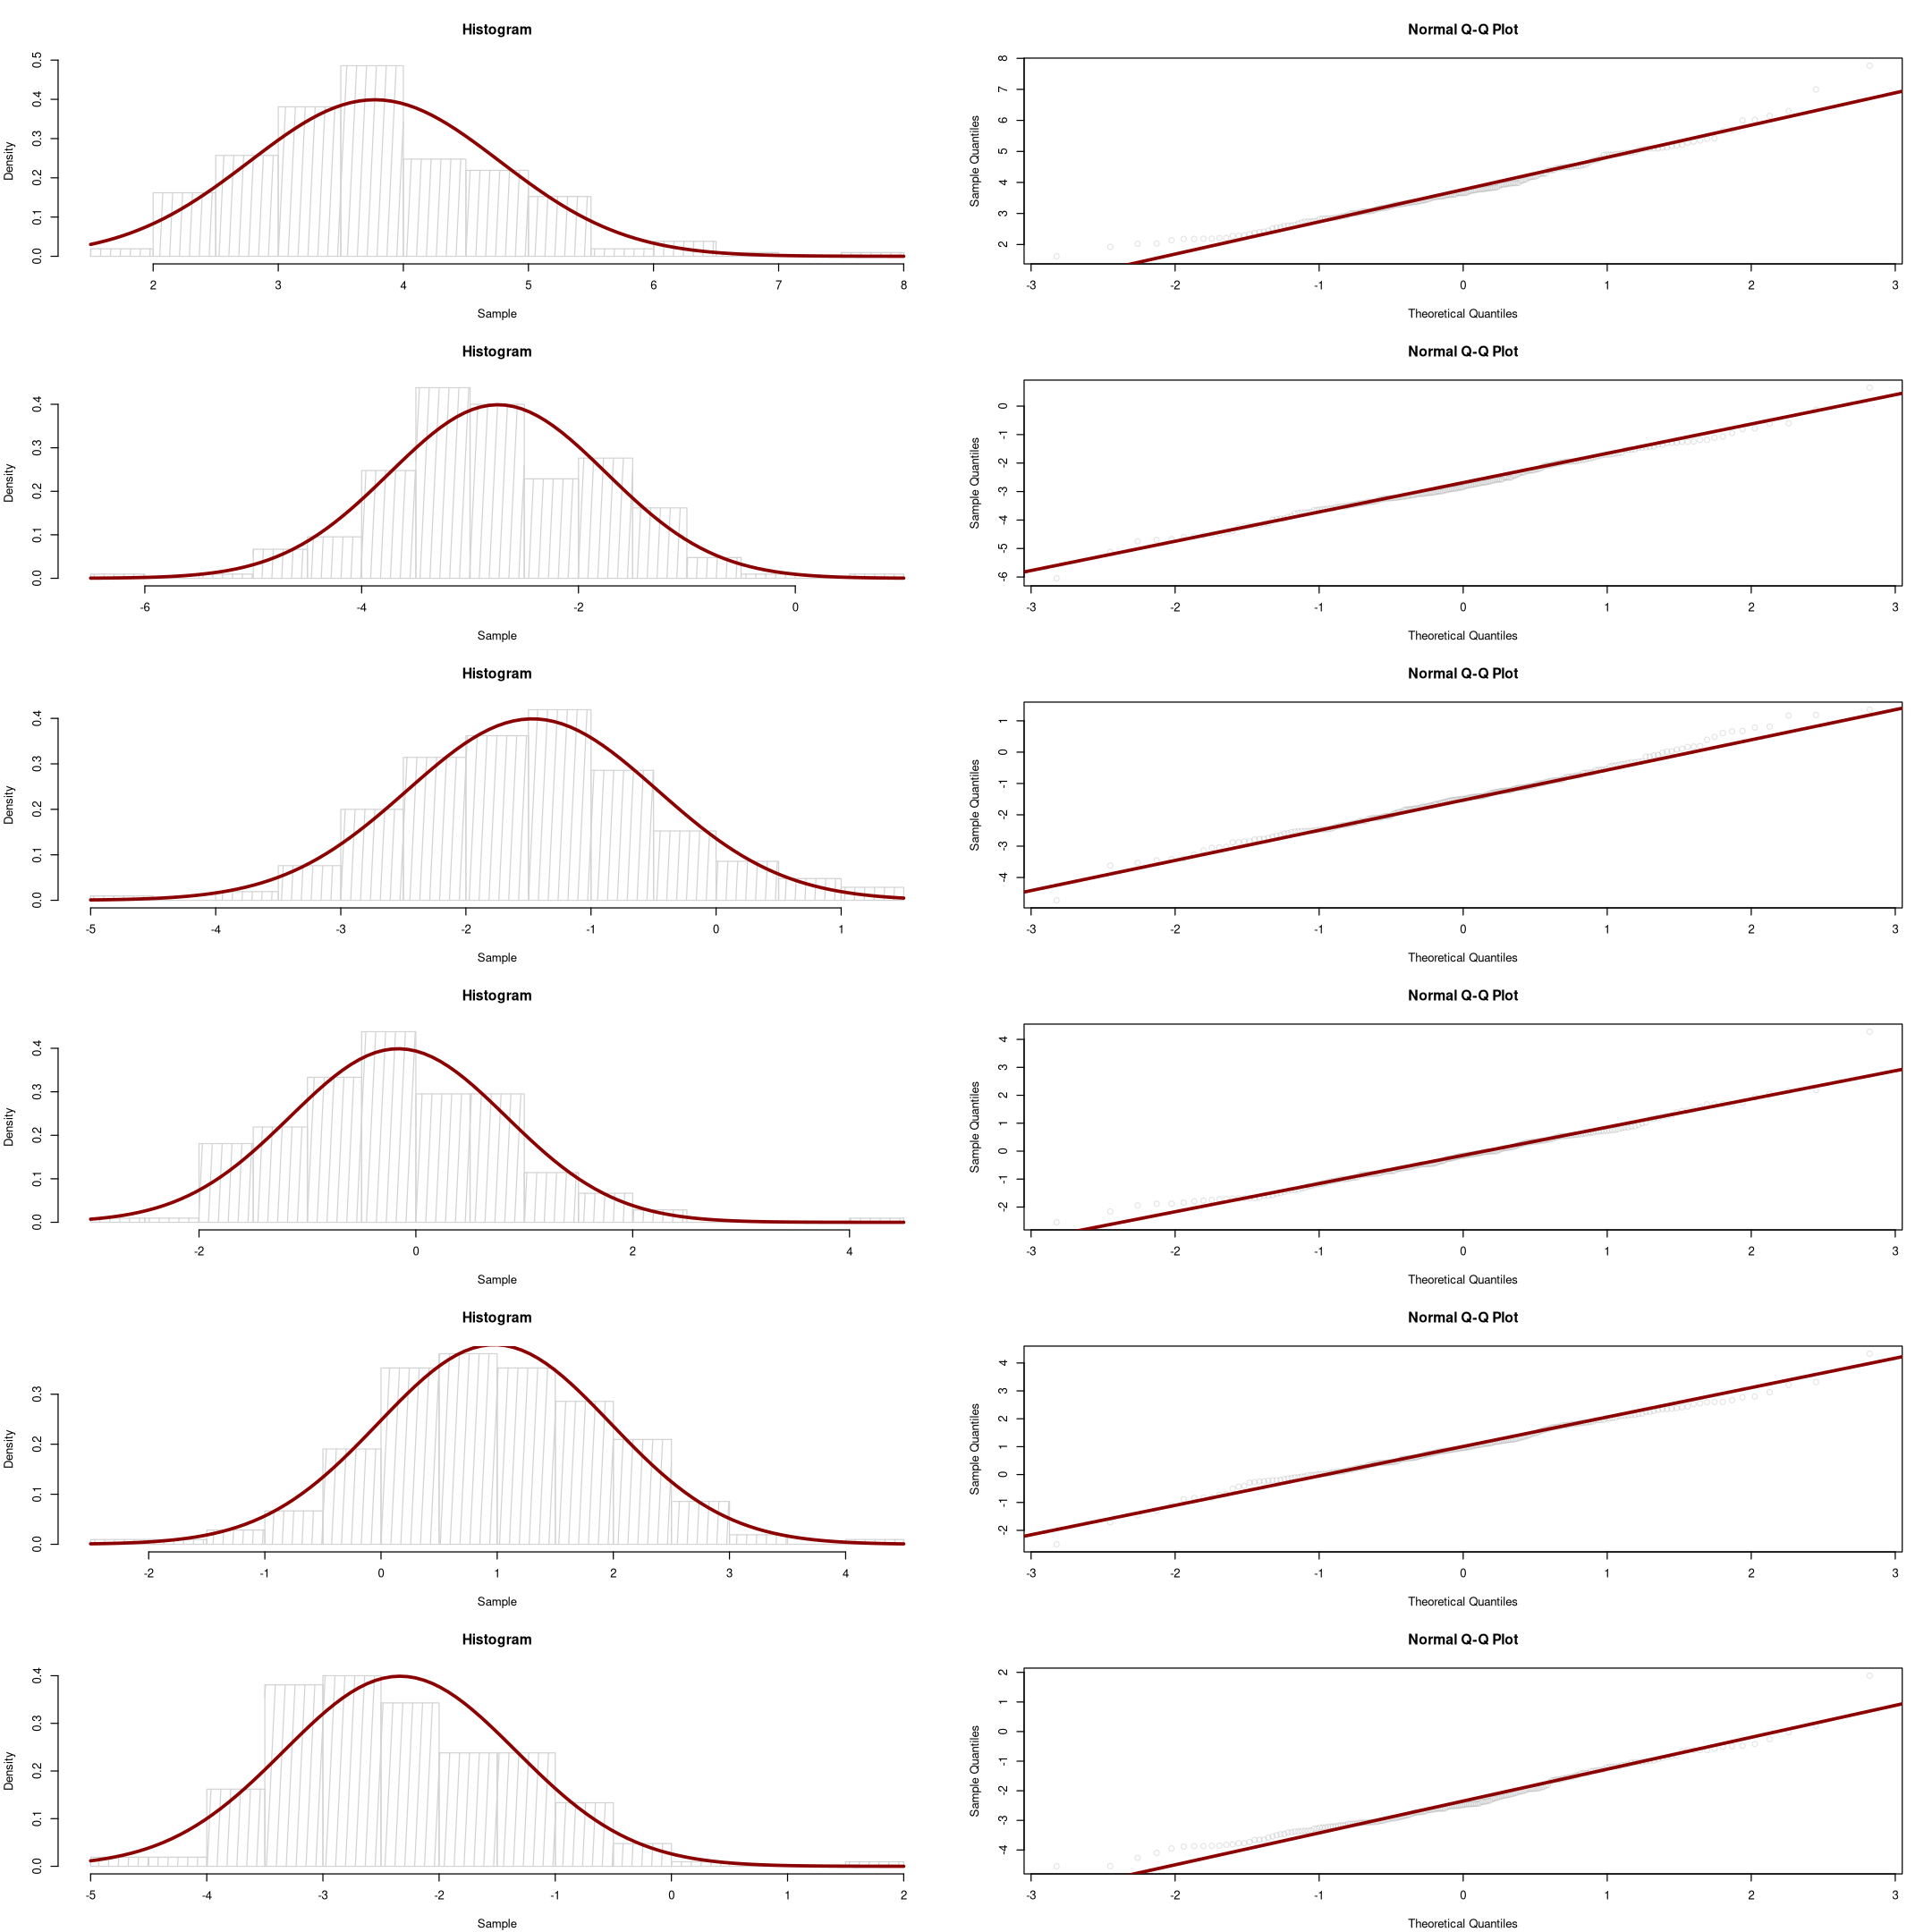

In [3]:
par(mfrow = c(6, 2), mar=c(4.1, 4.1, 4.1, 2.1))
options(repr.plot.width=18, repr.plot.height=18)

for (i in 1:6) {
	Sample = data[,i]
	hist(Sample, density=50, breaks=16, prob=TRUE, main="Histogram")
	curve(dnorm(x, mean=mean(Sample), sd=sqrt(var(Sample))), col="darkred", lwd=3, add=TRUE)

	qqnorm(Sample, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1))
	qqline(Sample, col="darkred", lwd=3)
}

Data appears normally distributed and is standardized to have its standard deviation equal to one

In [4]:
first = data[1:5,]; first
µmle = as.matrix(as.numeric(colMeans(first)))
µ = as.matrix(as.numeric(colMeans(data[6:210,])))
# µ = as.matrix(as.numeric(colMeans(data)))

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,3.320701,-4.672019,-3.6207425,-1.8788372,-1.304469,-2.1400544,-0.6836783,-0.6329174,2.916898,6.858462,⋯,-1.2646257,-3.6788223,-4.064593,-4.204200,-4.653301,2.291804,-4.5613786,0.8238200,2.663034,-1.282643
NA06993,4.522049,-2.504244,-0.2989289,1.4740600,1.952473,-0.8951127,1.2726317,0.2504213,3.031755,6.379089,⋯,0.9805873,-1.6659186,-3.935630,-3.568862,-1.885880,3.073146,-0.8298840,2.7096547,2.178062,-1.270634
NA07022,3.593433,-2.993319,-1.1402403,-1.0598208,1.248440,-2.4596897,1.2115513,-0.7036789,3.121900,7.938343,⋯,-2.2887468,-0.8547229,-3.655642,-2.887934,-1.629679,2.061270,-1.6536221,0.9795550,2.414203,-2.635291
NA07034,4.043400,-2.163135,-1.6537376,0.2452835,1.688383,-0.9272713,1.6320421,0.5425016,2.458150,7.731027,⋯,-2.3846812,-0.9925057,-3.033247,-2.722733,-1.613975,1.517324,-2.3507371,-0.3230593,2.188321,-2.646971
NA07055,4.899260,-2.276058,0.1766910,0.5478394,1.323379,-2.1625483,0.3988189,0.8411762,1.783395,7.105700,⋯,-0.6617594,-1.2074156,-3.378331,-3.555149,-2.252320,2.230214,-0.9541902,1.5572120,1.979752,-1.028758


$\hat{\mu}_{JS} = \left( 1 - \frac{k-2}{\| \bar{x} \|^2} \right) \bar{x}$


In [5]:
xnorm = sum(µmle**2)
µjs.zero = (1 - (1/25)*(ncol(data) - 2) / xnorm) * µmle

$\hat{\mu}_{JS} = \mu_0 + \left( 1 - \frac{k-2}{\| \bar{x} - \mu_0 \|^2} \right) (\bar{x} - \mu_0)$


In [6]:
# should we use true mean here?
xnorm = sum((µmle - µ)**2)
µjs.mean = µ + (1 - (1/25)*(ncol(data) - 2) / xnorm) * (µmle - µ)

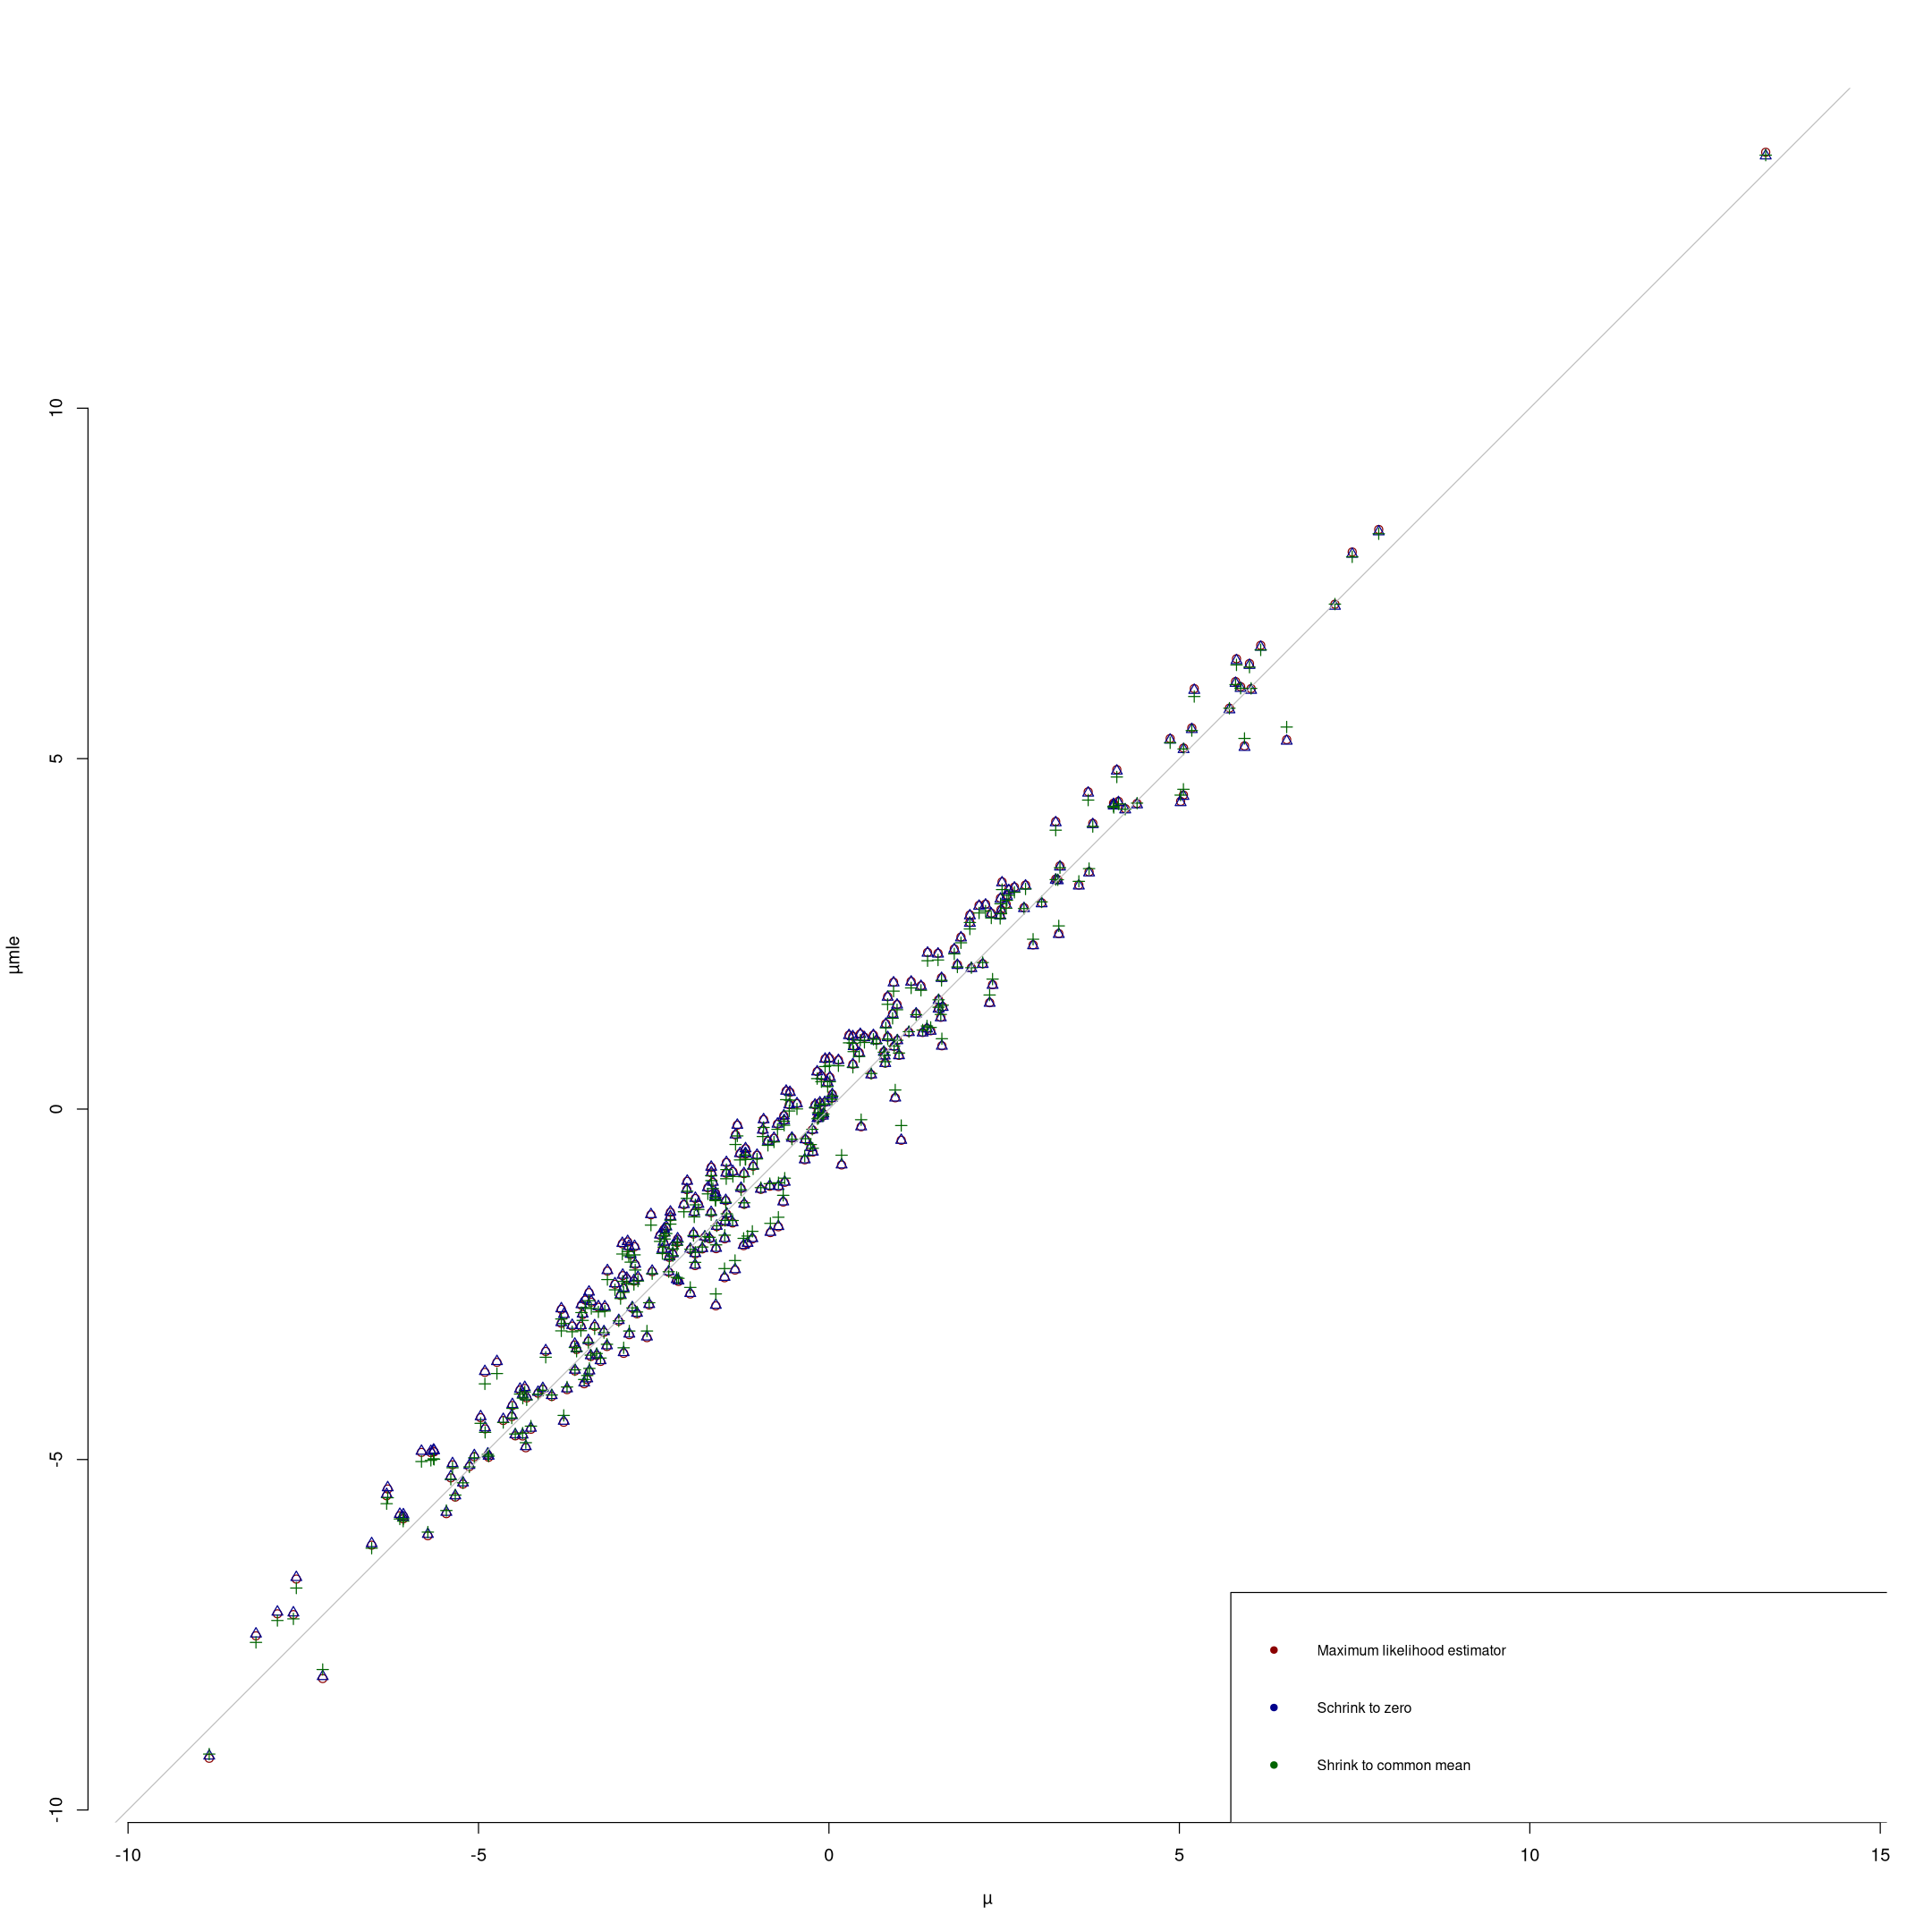

In [7]:
plot(µ, µmle, col = "darkred", asp = 1, frame = FALSE, pch=1)
points(µ, µjs.zero, col = "darkblue", pch=2)
points(µ, µjs.mean, col = "darkgreen", pch=3)
abline(0, 1, col = "gray")
legend(
	"bottomright",
	legend = c("Maximum likelihood estimator", "Schrink to zero", "Shrink to common mean"),
	col = c("darkred", "darkblue", "darkgreen"),
	pch = 19,
	cex = 0.8,
)

Mean sqared errors ???

In [8]:
sum((µ - µmle)**2)

[1] 83.61966

In [9]:
sum((µ - µjs.zero)**2)

[1] 83.74565

In [10]:
sum((µ - µjs.mean)**2)

[1] 61.47886

### Project 1

In [76]:
n = 1000; p = 950
X = matrix(data = rnorm(n * p, 0, sqrt(1e-3)), nrow = n)

In [168]:
model.prediction.error = function(k) {
	β = rep(0, p)
	β[1:k] <- 3

	e = rnorm(n, 0, 1)

	y = X %*% β + e
	B = solve(t(X) %*% X) %*% t(X) %*% y

	Y =  X %*% B 
	RSS = sum((Y - y)**2)
	M = X %*% solve(t(X) %*% X) %*% t(X)
	var = RSS / (n - p)

	return(c(
		PE  = sum((X %*% (β - B))**2) + n,
		PE1 = RSS + 2*var*p,
		PE2 = RSS + 2*1*p,
		PE3 = sum(((Y - y) / diag(M))**2)
	))
}

In [175]:
estimators = t(data.frame(replicate(30, model.prediction.error(2))))

In [176]:
estimators

,PE,PE1,PE2,PE3
X1,1923.854,1411.734,1936.198,40.29603
X2,1953.635,2127.877,1954.561,60.65766
X3,1947.783,2655.055,1968.078,75.76256
X4,1917.219,1618.650,1941.504,46.14661
X5,1905.181,1872.085,1948.002,53.38663
X6,1898.563,2050.897,1952.587,58.50621
X7,1909.503,2008.219,1951.493,57.28486
X8,1905.587,1753.701,1944.967,50.02999
X9,1912.603,1800.168,1946.158,51.37236
X10,1963.916,2439.535,1962.552,69.55247


In [177]:
residuals = (estimators - estimators[,1])[, -1]

In [178]:
residuals

,PE1,PE2,PE3
X1,-512.11981,12.3446184,-1883.558
X2,174.24120,0.9255572,-1892.978
X3,707.27162,20.2951883,-1872.021
X4,-298.56902,24.2852326,-1871.072
X5,-33.09556,42.8212468,-1851.794
X6,152.33423,54.0241719,-1840.057
X7,98.71614,41.9900540,-1852.218
X8,-151.88605,39.3798588,-1855.557
X9,-112.43507,33.5551693,-1861.231
X10,475.61949,-1.3637744,-1894.363


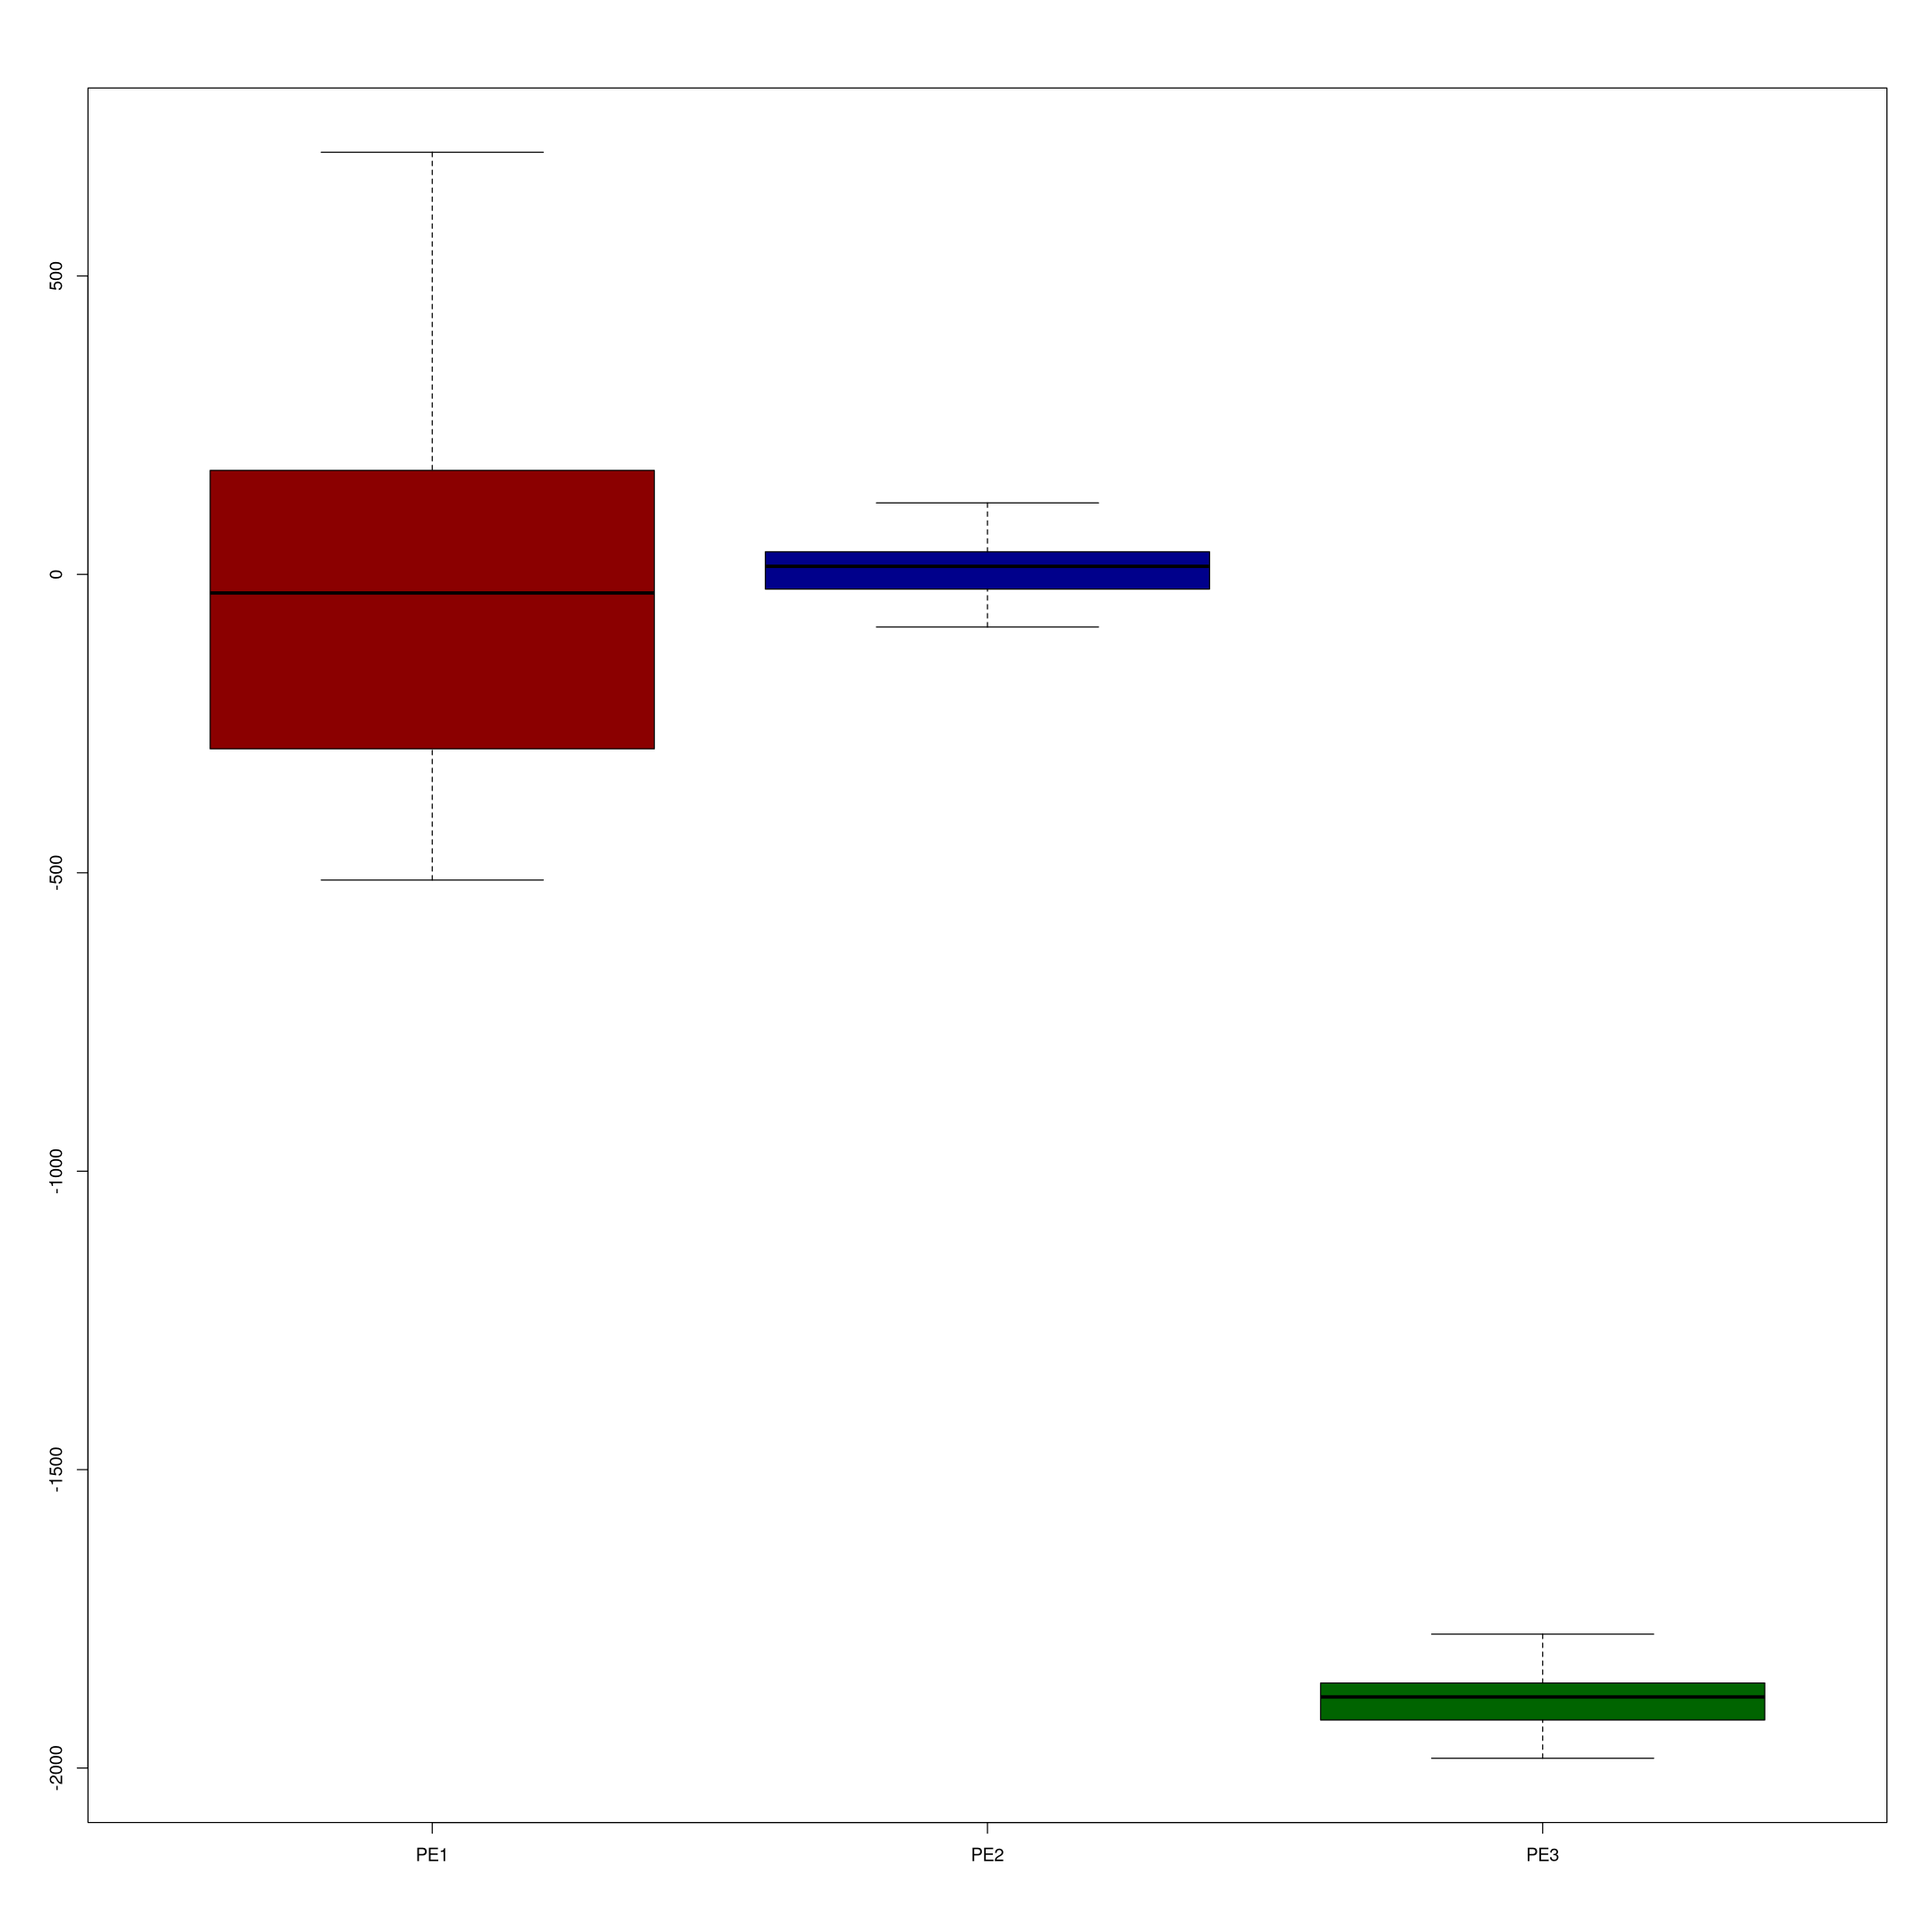

In [179]:
boxplot(residuals, col = c("darkred", "darkblue", "darkgreen"))

### Project 2

In [3]:
n = 1000; p = 950
X = matrix(data = rnorm(n * p, 0, sqrt(1e-3)), nrow = n)
β = rep(0, p); β[1:20] <- 6
e = rnorm(n, 0, 1)
y = X %*% β + e

In [4]:
diagnostics = function(B) c(
	E1  = sum((B - β)**2),
	E2  = sum((X %*% (B - β))**2),
	FDP = sum(B[21:p] != 0) / sum(B != 0),
	TPP = sum(B[1:20] != 0) / 20
) 

#### Ridge

In [5]:
# use intercept?
ridge = cv.glmnet(X, y, alpha=0, intercept = F)
ridge.diagnostics = diagnostics(coef(ridge)[-1,])

In [6]:
ridge.diagnostics

E1          E2         FDP         TPP 
574.9470073 451.3634208   0.9789474   1.0000000

#### LASSO

When fitting a cross-validated lasso model using cv.glmnet, two lambda values are commonly reported:

`cv_fit$lambda.min`: The value of lambda that gives the minimum mean cross-validated error. This is often referred to as the "best" lambda because it directly minimizes the prediction error on the validation set.

`cv_fit$lambda.1se`: The largest value of lambda for which the mean cross-validated error is within one standard error of the minimum. This lambda value usually results in a sparser model (fewer non-zero coefficients), potentially improving interpretability and generalization by favoring simpler models.

In [7]:
lasso = cv.glmnet(X, y, alpha=1, intercept = F)
lasso.min.diagnostics = diagnostics(coef(lasso, s = "lambda.min")[-1,])
lasso.1se.diagnostics = diagnostics(coef(lasso, s = "lambda.1se")[-1,])

In [8]:
lasso.min.diagnostics

E1          E2         FDP         TPP 
123.9090123 112.3331372   0.7826087   1.0000000

In [9]:
lasso.1se.diagnostics

E1          E2         FDP         TPP 
198.1296206 187.3361615   0.3548387   1.0000000

In [10]:
# what are the parameters of the distribution?
s = qnorm(1 - 0.1/2/p)
lasso.new.diagnostics = diagnostics(coef(lasso, s = s/n)[-1,])

#### SLOPE

In [22]:
# https://cran.r-project.org/web/packages/SLOPE/vignettes/introduction.html
SLOPE(X, y, lambda = qnorm(1 - seq(1, 950, 1)*0.1/2/p))

In [24]:
# https://cran.r-project.org/web/packages/bigstep/vignettes/bigstep.html
big = prepare_data(y, X)

In [28]:
results = stepwise(big, crit = aic)
results$model
# summary(results)
# get_model(results)

Starting stepwise, 0 variables, crit = 517.86, MSE = 1.678.

Variable 567 added with crit = 508.6, MSE = 1.66.

Variable 476 added with crit = 499.62, MSE = 1.642.

Variable 252 added with crit = 491.06, MSE = 1.624.

Variable 698 added with crit = 483.23, MSE = 1.608.

Variable 440 added with crit = 476.43, MSE = 1.594.

Variable 486 added with crit = 470.25, MSE = 1.581.

Variable 66 added with crit = 464.19, MSE = 1.569.

Variable 527 added with crit = 458.29, MSE = 1.556.

Variable 255 added with crit = 453.24, MSE = 1.545.

Variable 709 added with crit = 447.37, MSE = 1.533.

Variable 714 added with crit = 442.25, MSE = 1.522.

Variable 424 added with crit = 437.09, MSE = 1.511.

Variable 86 added with crit = 432.31, MSE = 1.501.

Variable 177 added with crit = 427.9, MSE = 1.492.

Variable 712 added with crit = 423.53, MSE = 1.482.

Variable 882 added with crit = 419.39, MSE = 1.473.

Variable 83 added with crit = 415.12, MSE = 1.464.

Variable 57 added with crit = 411.01, MSE = 

In [29]:
summary(results)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'summary': object 'results' not found
